In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error
from sklearn.linear_model import LinearRegression 
df = pd.read_csv('survey_results_public.csv')

#print head data
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Based on the ( CRISP - DM ) Rules , we will make data analysis for Stackover Flow web site on 2017 .


In [2]:
# if the data frame have more columns it will bwe good print all name columns for reading all names .
for x in df.columns:
    print(x)
    

Respondent
Professional
ProgramHobby
Country
University
EmploymentStatus
FormalEducation
MajorUndergrad
HomeRemote
CompanySize
CompanyType
YearsProgram
YearsCodedJob
YearsCodedJobPast
DeveloperType
WebDeveloperType
MobileDeveloperType
NonDeveloperType
CareerSatisfaction
JobSatisfaction
ExCoderReturn
ExCoderNotForMe
ExCoderBalance
ExCoder10Years
ExCoderBelonged
ExCoderSkills
ExCoderWillNotCode
ExCoderActive
PronounceGIF
ProblemSolving
BuildingThings
LearningNewTech
BoringDetails
JobSecurity
DiversityImportant
AnnoyingUI
FriendsDevelopers
RightWrongWay
UnderstandComputers
SeriousWork
InvestTimeTools
WorkPayCare
KinshipDevelopers
ChallengeMyself
CompetePeers
ChangeWorld
JobSeekingStatus
HoursPerWeek
LastNewJob
AssessJobIndustry
AssessJobRole
AssessJobExp
AssessJobDept
AssessJobTech
AssessJobProjects
AssessJobCompensation
AssessJobOffice
AssessJobCommute
AssessJobRemote
AssessJobLeaders
AssessJobProfDevel
AssessJobDiversity
AssessJobProduct
AssessJobFinances
ImportantBenefits
ClickyKeys
Jo

In [3]:
#print how many columnns and rows in dataframe .
df.shape

(51392, 154)

In [4]:
#for more information about the data
#how many Rows ?
#how many Columns ?
#What is data type ?
#how many rows integers ?
#how many rows object

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


In [5]:
def describe():
    
    """ describe data frame with both object and numeric data type 
    In this example, the data frame is described and [‘object’] 
    is passed to include parameter to see description of object series.
    [.20, .40, .60, .80] is passed to percentile parameter to view 
    the respective percentile of Numeric series."""
    
    #percentile lisr
    perc =[.20, .40, .60, .80] 
    
    # list of dtypes to include  
    include =['object', 'float', 'int'] 
    
    #calling describe method
    desc = df.describe(percentiles = perc , include = include)
    
    #disaplay
    return  desc
    
describe()
    
    



,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
count,51392.000000,51392,51392,51392,51392,51392,51392,42841,44008,38922,...,31062,35047,34938,33033,34720,34536,34419,34612,12891.000000,2566.000000
unique,NaN,5,4,201,4,7,9,16,7,10,...,5,29,10,97,5,5,5,5,NaN,NaN
top,NaN,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,A few days each month,20 to 99 employees,...,Disagree,Male,A bachelor's degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,NaN,NaN
freq,NaN,36131,24801,11455,37543,36148,21609,21409,15454,8587,...,18200,31589,10175,23415,11257,16061,20955,14603,NaN,NaN
mean,25696.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56298.480641,33142.220468
std,14835.736854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39880.905277,30162.988829
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
20%,10279.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19892.473118,2688.172043
40%,20557.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41250.000000,17618.558215
50%,25696.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000.000000,29364.263691


### : we will look the data and apply the steps  CRISP - DM


    
### Step 1 - 2 : Business understand & Data understand

**in this step we need to get answers for some questions from data like examples**

**1- how many the programmers contribute to open source projects in united state ?**

**2- how many the gender of male have the Computer science or software engineering degree ?**

**3- how many the ProgramHobby and what about the dataframe ?**


# Question 1 : 
## how many the programmers contribute to open source projects in united state ?

In [16]:
def pg_hobby():
    
    """
    for answer this question we need to explore the columns  
    [ProgramHobby] and [Country] for check all options and get many programming 
    contribute to open source projects in united state .
    """
    
    #count all types in the varibles ProgramHobby
    print(" The All Count  ProgramHobby  \n \n" + str(df['ProgramHobby'].value_counts()) + "\n\n")
    
    #count all types in the varibles Country
    print(" The All Count Countries  \n \n " + str(df['Country'].value_counts())  + "\n\n")
    
    #selected the data we need to get only based on the question .
    pg_contribute_op = df.loc[(df['ProgramHobby'] == 'Yes, I contribute to open source projects') & (df['Country'] == 'United States')]
    
    #Display The Answer
    print("the many programmers contribute to open source projects in united state is " + str(len(pg_contribute_op)))
    
    #Display the data frame .
    return pg_contribute_op.head(3)
    
    
pg_hobby()
    
    

 The All Count  ProgramHobby  
 
Yes, I program as a hobby                    24801
Yes, both                                    13756
No                                            9787
Yes, I contribute to open source projects     3048
Name: ProgramHobby, dtype: int64


 The All Count Countries  
 
 United States                     11455
India                              5197
United Kingdom                     4395
Germany                            4143
Canada                             2233
                                  ...  
Burkina Faso                          1
Mali                                  1
Falkland Islands                      1
S. Georgia & S. Sandwich Isls.        1
Saint Helena                          1
Name: Country, Length: 201, dtype: int64


the many programmers contribute to open source projects in united state is 501


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
115,116,Professional developer,"Yes, I contribute to open source projects",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,A few days each month,10 to 19 employees,...,Strongly disagree,Male,A bachelor's degree,White or of European descent,Somewhat agree,Somewhat agree,Strongly disagree,Disagree,90000.0,NaN
172,173,Professional non-developer who sometimes write...,"Yes, I contribute to open source projects",United States,No,Employed full-time,Bachelor's degree,Management information systems,A few days each month,100 to 499 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN
193,194,Professional non-developer who sometimes write...,"Yes, I contribute to open source projects",United States,No,Employed full-time,Bachelor's degree,A business discipline,It's complicated,Fewer than 10 employees,...,Disagree,Male,A bachelor's degree,White or of European descent,NaN,Somewhat agree,Disagree,Agree,NaN,NaN


# Question 2 : 
## how many the gender of male have the Computer science or software engineering degree ?


In [9]:
def gender_degree():
    
    """
    for answer this question we need to explore the columns  
    [MajorUndergrad] and [Gender] for check all options and know  
    the gender type have a Computer science or software engineering degree.
    """
    
    #count all data in the varibles MajorUndergrad
    print(" The All Count the MajorUndergrad  \n \n" + str(df['MajorUndergrad'].value_counts()) + "\n\n")
    
    #count all types in the varibles Genter 
    print(" The All Count the Gender  \n \n " + str(df['Gender'].value_counts())  + "\n\n")
    
    #selected the data we need to get only based on the question .
    degree_male = df.loc[(df['MajorUndergrad'] == 'Computer science or software engineering') & (df['Gender'] == 'Male')]
    
    #Display The Answer
    print("many the gender of male have the Computer science or software engineering degree is " + str(len(degree_male)))
    
    #Display the data frame .
    return degree_male.head(3)
    
    
#called function    
gender_degree()
    

 The All Count the MajorUndergrad  
 
Computer science or software engineering                        21409
Computer engineering or electrical/electronics engineering       4364
Computer programming or Web development                          3883
Information technology, networking, or system administration     2140
A natural science                                                1865
A non-computer-focused engineering discipline                    1789
Mathematics or statistics                                        1648
Something else                                                   1060
A humanities discipline                                           901
A business discipline                                             900
Management information systems                                    654
Fine arts or performing arts                                      646
A social science                                                  633
I never declared a major                            

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
7,8,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,...,Somewhat agree,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN


## Question3 
3. Provide a pandas series of the  ProgramHobby  values in the dataset along with the count of the number of individuals with each status. 
and make a bar chart of the proportion of individuals in each status

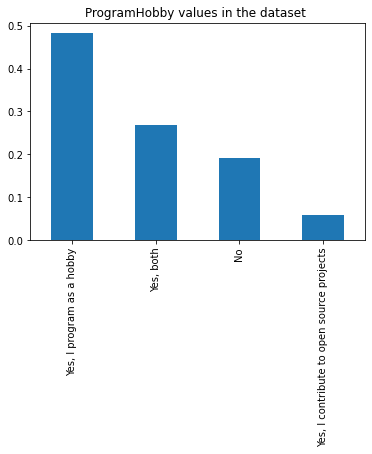

In [8]:
def ProgramHobby_Types():
    
    """
    for answer this question we need to explore the column 
    [ProgramHobby] and countt all types.
    """
    
    
    #count the programhobby varible and make bar chart 
    status_vals = df['ProgramHobby'].value_counts()
    
    #devision thee counts at the shape then make bar chart
    (status_vals/df.shape[0]).plot(kind="bar");
    
    #assign the title 
    plt.title("ProgramHobby values in the dataset ");


#called function
ProgramHobby_Types()
    




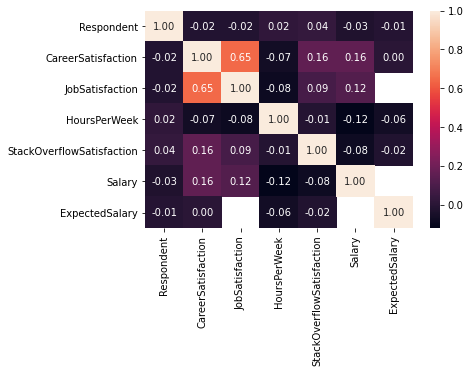

In [10]:
# representing the data in heatmap 
sns.heatmap(df.corr(), annot=True, fmt='.2f');

# step 3  : Prepare Data  

 - in this step we will working around data and make cleaning data 
 - in this step we need to know some info same 
 - **what is percent missing values in the varibles**
 - **what is varibles have more missing values** 
 - **what is frequent values in the varibles**
 - **what is the best decesion for missing values**
 - **Assign the predicts varibles and Response varibles**



In [12]:
def Perecnt_Missing():
    
    '''
    we need to get the percent missing values 
    in all columns for see what is varibles 
    have more missing values.
    '''
    
    #select the missing values and get sum then 
    #multiplication * 100 then division at the len dataframe 
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'Column_name': df.columns,
                                 'percent_missing': percent_missing})
    
    #Display from 0 to 20 columns
    return missing_value_df[0:20]


#called function
Perecnt_Missing()


,Column_name,percent_missing
Respondent,Respondent,0.000000
Professional,Professional,0.000000
ProgramHobby,ProgramHobby,0.000000
Country,Country,0.000000
University,University,0.000000
EmploymentStatus,EmploymentStatus,0.000000
FormalEducation,FormalEducation,0.000000
MajorUndergrad,MajorUndergrad,16.638776
HomeRemote,HomeRemote,14.367995
CompanySize,CompanySize,24.264477


- Chose the predicts varibles inside list and check the missing values in this varibles
**then check the count values for know what is values more repeas

In [65]:
def the_missing_in_predict():
    
    '''
    in this code we will know how many percent 
    the missing values in predict varibles 
    
    '''
    
    #create list have the missing values 
    predict_varibles  = df[['Professional' , 'MobileDeveloperType' , 'WebDeveloperType', 'YearsProgram']]
    #get the sum missing values and multiplication * 100 then division at the len dataframe
    percent_missing = predict_varibles.isnull().sum() * 100 / len(df)
    
    #Display
    print(percent_missing)
    

    '''
    after we know the percent of missing values 
    in the varibles in this step we will know 
    what is the most frequent values in
    predict varibles 
    
    '''
    
    #add the list predict varibles in teh loop
    #for not repeat the code more time 
    for column in predict_varibles:
        print("\n" + column)
        print(df[column].value_counts())
        
        
#called function
the_missing_in_predict()

Professional           0.0
MobileDeveloperType    0.0
WebDeveloperType       0.0
YearsProgram           0.0
dtype: float64

Professional
Professional developer                                  36131
Student                                                  8224
Professional non-developer who sometimes writes code     5140
Used to be a professional developer                       983
None of these                                             914
Name: Professional, dtype: int64

MobileDeveloperType
Android                                    50480
iOS                                          534
iOS; Android                                 307
iOS; Android; Windows Phone                   44
iOS; Android; Windows Phone; Blackberry        6
Android; Windows Phone                         6
Windows Phone                                  5
iOS; Windows Phone                             5
Android; Blackberry                            2
iOS; Android; Blackberry                       2
Android; 

- Take the decision for missing values  and assign the Predicts varibles and Response varible.

In [68]:
def fillna_col(df):
    
    '''
    One of the best ways to working with missing values 
    is to replace the lead value with the most 
    frequently occurring value inside the variable
    used the function (fillna)
    '''
    
    #Replace the missing values in varible - Professional
    #To the value - Professional developer
    df['Professional'].fillna('Professional developer' , inplace=True)
    
    #Replace the missing values in varible MobileDeveloperType
    #To the value - Android
    df['MobileDeveloperType'].fillna('Android' , inplace=True)
    
    #Replace the missing values in varible - WebDeveloperType
    #To the values Full - stack Web developer
    df['WebDeveloperType'].fillna('Full stack Web developer' , inplace=True)
    
    #Replace the missing values in varible - YearsProgram
    #To the values Full - 20 or more years
    df['YearsProgram'].fillna('20 or more years' , inplace=True)
    
    #select the predict varible in the list 
    predict_varibles = df[['Professional' , 'MobileDeveloperType' , 'WebDeveloperType', 'YearsProgram']]
    
    
    '''
    before build the model and moved into machine learning step
    must be transfer all the categorical varibles to Quantitative
    varibles , because the model work with numercal data only.
    '''
    
    #transfer categorical data to Quantitative data
    #used by the (get_dummies) method
    df_new = pd.get_dummies(predict_varibles, dummy_na=False)
    
    #after tranfer data must  be add the new data to dataframe
    #we will make thie used the (concat) function 
    df = pd.concat([df , df_new], axis=1)
    
    #Final step we will delete the source varibles and used the new varibles 
    col_to_delete = df[['Professional' , 'MobileDeveloperType' , 'WebDeveloperType', 'YearsProgram']]
    df.pop(col_to_delete)
    
    #here we will chek the missing valuesin colums still found or deleted
    percent_missing = predict_varibles.isnull().sum() * 100 / len(df)
    print("\n the missing values percent is \n \n " + str(percent_missing))
    

    '''
    Now we will select the Response varible and cleaning the 
    missing values, A Response Variable (or dependent variable) 
    is that variable whose variation depends on other variables.
    The response variable is often related to the independent variable
    in this project the Response varible is 'Salary' .
    '''
    
    #We will change the missing valuse in the 
    #Response varible to the (mean) value
    
    #get the mean value for the Salary varible
    Mean_Y = df['Salary'].mean()
    
    #Replace the missing value to the mean value
    #used by the function (fillna)
    df['Salary'].fillna(Mean_Y, inplace=True)
    
    #validation the Respone varible have missing values
    if df['Salary'].isnull().any() == True :
        
        #show message if have any missing value
        print('Please Replace The Missing Values ')
        
    else:
        #if replace the missing value print the count values
        print("\n The Value Counts for Response Varible is  \n")
        print(df['Salary'].value_counts())
    
    
    '''
    After cleaning the data we will assign the 
    Predict. varible and called (X) 
    and Response varible Called (y)
    '''
    
    #add global functon to predict varible for used out main method 
    global X
    
    #Assign the predict varible
    X = df_new
    
    #add global functon to Response varible for used out main method 
    global y
    
    #Assign the Response varible
    y = df['Salary']
    
    #Validation from len the Response varible. 
    print('\n The len Response varible after replacing values is ' + str(len(y)))
    
    #validation of the len predicts varibles
    print("\n \n The len for predicts varibles is " + str((len(X)))  + " \n \n")
    
    #Display head the predicts varibles 
    return (X.head())


#called function
fillna_col(df)



 the missing values percent is 
 
 Professional           0.0
MobileDeveloperType    0.0
WebDeveloperType       0.0
YearsProgram           0.0
dtype: float64

 The Value Counts for Response Varible is  

56298.480641     38501
120000.000000      167
110000.000000      164
100000.000000      155
75000.000000       149
                 ...  
77322.000000         1
76095.025984         1
14262.132717         1
33057.851240         1
77700.000000         1
Name: Salary, Length: 3050, dtype: int64

 The len Response varible after replacing values is 51392

 
 The len for predicts varibles is 51392 
 



,Professional_None of these,Professional_Professional developer,Professional_Professional non-developer who sometimes writes code,Professional_Student,Professional_Used to be a professional developer,MobileDeveloperType_Android,MobileDeveloperType_Android; Blackberry,MobileDeveloperType_Android; Windows Phone,MobileDeveloperType_Android; Windows Phone; Blackberry,MobileDeveloperType_Windows Phone,...,YearsProgram_2 to 3 years,YearsProgram_20 or more years,YearsProgram_3 to 4 years,YearsProgram_4 to 5 years,YearsProgram_5 to 6 years,YearsProgram_6 to 7 years,YearsProgram_7 to 8 years,YearsProgram_8 to 9 years,YearsProgram_9 to 10 years,YearsProgram_Less than a year
0,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### Step 4 :  Data Modeling
- in this step we will work in machine learning step


In [73]:
def data_modeling():
    
    '''
    in this section we will building the model
    for predict the salary based on the 
    Predict data .
    '''

#split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

# Instantiate Model
model = LinearRegression(normalize=True) 

#Fit Model
model.fit(X_train, y_train) 

#Predict and score the model
predict = model.predict(X_test) 

#Display Predict
print(predict)

#called function
data_modeling()

[64400. 53776. 55824. ... 50896. 56400. 51504.]


### Step 5 : Evaluate Results

In [96]:
def evaluated():
    
    '''
    this is final step in analysis 
    we will evaluated Results model
    used by Accuricy algorithms
    '''
    
    #Accuracy Model used Algorithm (Mean Squared Error)
    print("The mean squared score for the model using only quantitative variables was {} on {} values.".format(mean_squared_error(y_test, predict), len(y_test)))

     #Accuracy Model used Algorithm (r-squared Error)
    print("The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, predict), len(y_test)))

    
evaluated()

The mean squared score for the model using only quantitative variables was 1.0002248107407395e+29 on 15418 values.
The r-squared score for the model using only quantitative variables was -2.48560182584156e+20 on 15418 values.
